# Proyecto de Ciencia de Datos

**Autor:** Victor Hugo Villegas  
**Nombre del proyecto:** Google Advanced Data Analysis: HR Capstone Dataset  
**Fecha:** 08 de mayo de 2025  
**Descripción:** Análisis exploratorio y modelado predictivo para identificar factores clave en la rotación de empleados dentro de la empresa Salifort Motors.  


### 1. Importación de librerías y paquetes

Este apartado contiene todas las bibliotecas necesarias para el análisis de datos, visualización y modelado predictivo.

---


### 📊 Manipulación de Datos

Estas librerías permiten la gestión y transformación de datos, facilitando su análisis y preprocesamiento.  
- **NumPy**: Para cálculos matemáticos y manejo de arrays eficientes.  
- **Pandas**: Para la manipulación y análisis de datos en estructuras como DataFrames y Series.  

```python
import numpy as np
import pandas as pd


### 📈 Visualización de Datos

Estas librerías ayudan a generar gráficos y representaciones visuales del dataset, facilitando su interpretación.  
- **Matplotlib**: Proporciona herramientas básicas de visualización con gráficos estáticos.  
- **Seaborn**: Extensión de Matplotlib que permite visualizaciones más detalladas y estilizadas.  

```python
import matplotlib.pyplot as plt
import seaborn as sns


### ⚙️ Configuración de DataFrames

Esta configuración permite visualizar todas las columnas del DataFrame sin restricciones, facilitando el análisis exploratorio y evitando que se oculten datos importantes.

```python
pd.set_option('display.max_columns', None)


### 🤖 Modelado de Datos

Estas librerías se utilizan para construir y evaluar modelos de aprendizaje supervisado que permitirán predecir la rotación de empleados.  
- **XGBoost**: Algoritmo basado en árboles de decisión, eficiente para problemas de clasificación y regresión.  
- **Regresión Logística**: Modelo estadístico usado para clasificación binaria.  
- **Árboles de Decisión**: Técnica de clasificación basada en reglas.  
- **Bosques Aleatorios**: Conjunto de árboles de decisión que mejora la precisión del modelo.  

```python
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


### 📏 Métricas y Evaluación

Estas funciones permiten medir el rendimiento de los modelos y evaluar su precisión, asegurando una selección óptima.  
- **GridSearchCV**: Método para optimizar hiperparámetros mediante validación cruzada.  
- **Train-Test Split**: Divide los datos en conjuntos de entrenamiento y prueba.  
- **Métricas de clasificación**: Incluyen precisión, recall, F1-score y AUC-ROC para evaluar el rendimiento del modelo.  

```python
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, roc_auc_score, roc_curve)


### 💾 Guardado de Modelos

Estas herramientas permiten almacenar los modelos entrenados para su uso posterior sin necesidad de volver a entrenarlos.  
- **Pickle**: Biblioteca para serializar y deserializar objetos de Python, facilitando la conservación de modelos entrenados.  

```python
import pickle


### Cargar el Dataset y Visualizaciones Preliminares

En esta sección, se carga el dataset y se realizan las primeras exploraciones de los datos. Se examinan las dimensiones, tipos de variables y valores faltantes para entender la estructura del dataset antes del análisis profundo.

---


In [11]:
# Ruta del archivo
file_path = 'C:/Users/victo/OneDrive/Data_Science/Python/HR_capstone_dataset.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Ver las primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [20]:
# Revisar valores únicos en la variable objetivo
print("\nValores únicos en la variable objetivo (left):")
print(df['left'].value_counts())



Valores únicos en la variable objetivo (left):
left
0    11428
1     3571
Name: count, dtype: int64


In [15]:
# Ver tipos de datos y asegurarse de que las variables categóricas están bien identificadas
print("Tipos de datos en el dataset:")
print(df.dtypes)


Tipos de datos en el dataset:
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


### 2. Exploración y Limpieza de Datos (EDA) 🧐

### 📌 Objetivo  
Entender la estructura de los datos, identificar patrones y preparar el dataset para el análisis y la construcción de modelos predictivos.

### 🚀 Acciones  
#### 📊 Estadísticas Descriptivas  
Analizaremos las principales medidas estadísticas para variables numéricas:  
- **Media**: Promedio de los valores para entender tendencias generales.  
- **Mediana**: Punto central de la distribución, útil cuando existen valores extremos.  
- **Desviación estándar**: Grado de variabilidad de los datos, indicando qué tan dispersos están respecto a la media.  
- **Distribución y rangos**: Valores mínimos, máximos y percentiles para evaluar la dispersión de los datos.  

#### 🔍 Detección de Valores Nulos  
Identificaremos posibles datos faltantes y analizaremos su impacto en el dataset. Se tomarán decisiones sobre imputación o eliminación si es necesario.  

#### 🚫 Identificación de Valores Atípicos  
Exploraremos la presencia de valores anómalos mediante boxplots y otras técnicas de detección.  

#### 🎭 Análisis de Variables Categóricas  
Revisaremos la distribución de datos categóricos, contando sus frecuencias y analizando la cardinalidad de las categorías.  

#### 🔄 Normalización y Transformaciones  
Si es necesario, aplicaremos escalado o transformación de datos para mejorar la calidad del análisis y el rendimiento de los modelos.  

---

El EDA permitirá obtener una visión completa del dataset para tomar decisiones acertadas para la preparación de datos. ¡Comienzo con la exploración! 🚀📊  


# 📖 Diccionario de Datos  

Este proyecto utiliza un dataset llamado **HR_capstone_dataset.csv**, que contiene información autoinformada de empleados en una corporación multinacional ficticia dedicada a la fabricación de vehículos.  

## 📌 Estructura del Dataset  
El dataset consta de:  
- **14,999 filas** → Cada fila representa un empleado único.  
- **10 columnas** → Variables con características clave sobre cada empleado.  

### 📊 **Descripción de las Variables**  

| **Columna**            | **Tipo**  | **Descripción** |
|------------------------|----------|-----------------------------------------------|
| satisfaction_level     | `int64`  | Nivel de satisfacción del empleado [0-1] |
| last_evaluation       | `int64`  | Puntaje de la última evaluación de desempeño [0-1] |
| number_project        | `int64`  | Número de proyectos en los que participa el empleado |
| average_monthly_hours | `int64`  | Promedio de horas trabajadas por mes |
| time_spend_company    | `int64`  | Años de experiencia en la compañía |
| work_accident        | `int64`  | Si el empleado ha sufrido un accidente laboral (0 = No, 1 = Sí) |
| left                 | `int64`  | Si el empleado ha dejado la compañía (0 = No, 1 = Sí) |
| promotion_last_5years | `int64`  | Si el empleado ha sido promovido en los últimos 5 años (0 = No, 1 = Sí) |
| department           | `str`    | Departamento donde trabaja el empleado |
| salary              | `str`    | Nivel de salario: `low`, `medium`, `high` |

---

Esta sección servirá como referencia antes de analizar los histogramas y distribuciones de datos en el **EDA**, permitiendo interpretar mejor la relación entre las variables.  

📊 **Ahora que ya tenemos la estructura del dataset clara, podemos proceder con el análisis visual!** 🚀  


In [16]:
print("Estadísticas descriptivas:")
print(df.describe())

Estadísticas descriptivas:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%           

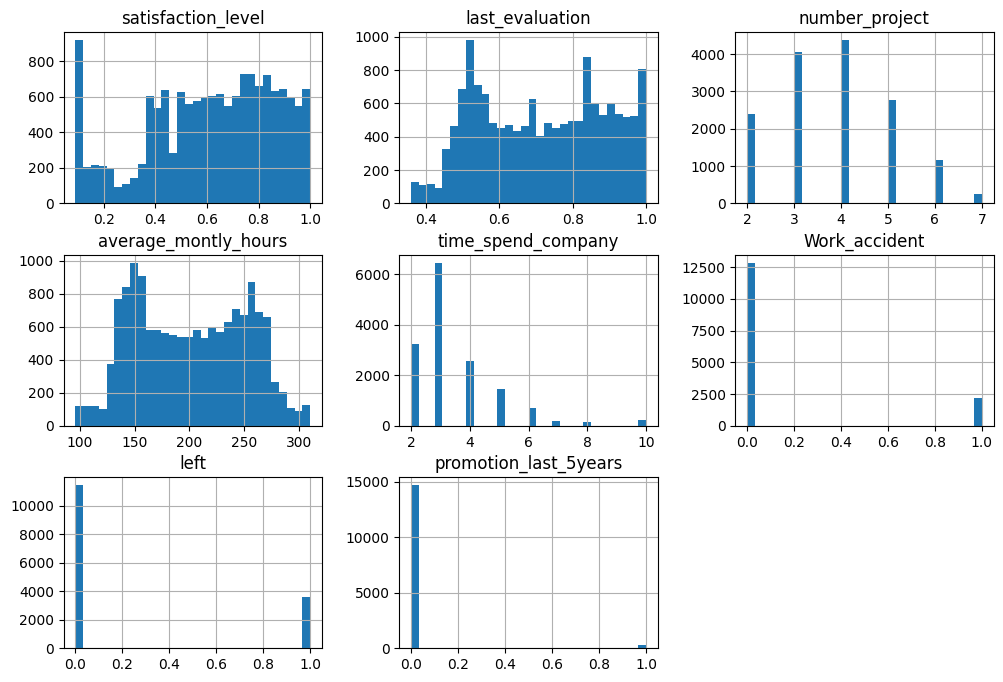

In [19]:
import matplotlib.pyplot as plt  # Importar matplotlib

# Histograma para ver la distribución de cada variable numérica
df.hist(figsize=(12,8), bins=30)
plt.show()  
